In [1]:
import sys
sys.path.append("../")

In [2]:
from pyrates.frontend import CircuitTemplate
import networkx as nx
from IPython.display import Image
import os
os.environ["PATH"] += os.pathsep + 'C:/Program Files (x86)/Graphviz2.38/bin/'
from matplotlib import pyplot as plt
from pprint import pprint

In [3]:
circuit = CircuitTemplate.from_yaml("pyrates.examples.jansen_rit.JRC").apply()

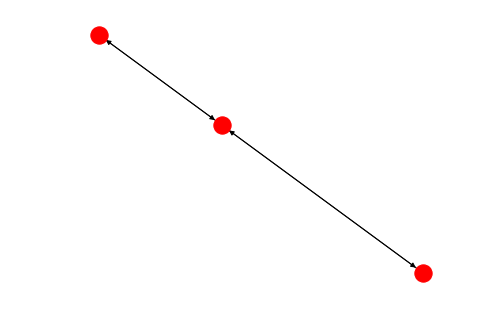

In [4]:
nx.draw(circuit.graph)
plt.draw()

In [5]:
pprint(dict(circuit.nodes(data=True)))

{'EIN.0': {'node': <pyrates.frontend.node.NodeIR object at 0x000001E0B5583D68>},
 'IIN.0': {'node': <pyrates.frontend.node.NodeIR object at 0x000001E0B5583BE0>},
 'PC.0': {'node': <pyrates.frontend.node.NodeIR object at 0x000001E0B5583358>}}


In [6]:
dot_circ = nx.drawing.nx_pydot.to_pydot(circuit.graph)

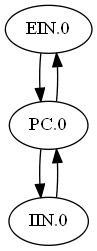

In [7]:
from copy import deepcopy
stripped_circuit = deepcopy(circuit)
for node in stripped_circuit.nodes:
    stripped_circuit.nodes[node].pop("node", None)
# for edge in stripped_circuit.edges:
#     stripped_circuit.edges[edge].pop("edge_ir", None)
dot_circ = nx.drawing.nx_pydot.to_pydot(stripped_circuit.graph)
png = dot_circ.create_png()
Image(data=png)

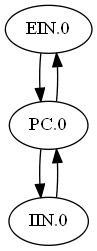

In [9]:
from pyrates.utility.graph_plotting import simple_plot
simple_plot(circuit)